# 커피 지수 (스타벅스 + 커피빈) / (빽다방 + 이디야)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 각 광역시,도 데이터 취합

In [2]:
metros = ['서울', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '세종', '울산', '인천', '전남', '전북', '제주', '충남', '충북']
stores_value = []
for i in range(len(metros)):
    stores_value.append(pd.read_csv(f"./data/소상공인시장진흥공단_상가(상권)정보_{metros[i]}_202009.csv", sep='|', encoding='utf8')[['상호명', '상권업종중분류명', '도로명주소', '경도', '위도']])

In [3]:
store_list = stores_value[0]
for i in range(1, len(stores_value)):
    store_list = store_list.append(stores_value[i])
store_list

,상호명,상권업종중분류명,도로명주소,경도,위도
0,커피빈코리아선릉로93길점,커피점/카페,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
1,프로포즈,유흥주점,서울특별시 금천구 가산로 34-6,126.899220,37.471711
2,와라와라호프,유흥주점,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
3,가락사우나내스낵,대중목욕탕/휴게,서울특별시 송파구 가락로 71,127.104071,37.500249
4,고려대학교교육관쎄리오점,커피점/카페,서울특별시 성북구 안암로 145,127.031702,37.588485
...,...,...,...,...,...
96636,특미로,한식,충청북도 제천시 봉양읍 용두대로36길 17,128.159446,37.158754
96637,아줌마식당,한식,충청북도 충주시 사직산17길 28-12,127.926600,36.972237
96638,피자본,패스트푸드,충청북도 청주시 흥덕구 2순환로 1233,127.431131,36.626212
96639,카페,커피점/카페,충청북도 청주시 서원구 수곡로 112-1,127.469841,36.621037


### 카페 추리기

In [4]:
cafe_list = store_list[store_list['상권업종중분류명'] == '커피점/카페'].reset_index()
cafe_list.head()

,index,상호명,상권업종중분류명,도로명주소,경도,위도
0,0,커피빈코리아선릉로93길점,커피점/카페,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
1,4,고려대학교교육관쎄리오점,커피점/카페,서울특별시 성북구 안암로 145,127.031702,37.588485
2,7,스완카페트,커피점/카페,서울특별시 영등포구 도신로10가길 11-1,126.897710,37.503693
3,25,왕실,커피점/카페,서울특별시 중구 남대문로 52-13,126.982419,37.562274
4,29,커피빈,커피점/카페,서울특별시 서초구 서초중앙로 118,127.014217,37.492388


### ID에 사용할 지역 코드 만들기

In [5]:
region = []
for i in cafe_list.index:
    if cafe_list['도로명주소'][i].split()[2][-1] == '구':
        if cafe_list['도로명주소'][i].split()[0][-2] == '북':
            region.append(cafe_list['도로명주소'][i].split()[0][0] + '북' + ' ' + cafe_list['도로명주소'][i].split()[1] + ' ' + cafe_list['도로명주소'][i].split()[2])
        elif cafe_list['도로명주소'][i].split()[0][-2] == '남':
            region.append(cafe_list['도로명주소'][i].split()[0][0] + '남' + ' ' + cafe_list['도로명주소'][i].split()[1] + ' ' + cafe_list['도로명주소'][i].split()[2])
        else:
            region.append(cafe_list['도로명주소'][i].split()[0][:2] + ' ' + cafe_list['도로명주소'][i].split()[1] + ' ' + cafe_list['도로명주소'][i].split()[2])
    else:
        if cafe_list['도로명주소'][i].split()[0][-2] == '북':
            region.append(cafe_list['도로명주소'][i].split()[0][0] + '북' + ' ' + cafe_list['도로명주소'][i].split()[1])
        elif cafe_list['도로명주소'][i].split()[0][-2] == '남':
            region.append(cafe_list['도로명주소'][i].split()[0][0] + '남' + ' ' + cafe_list['도로명주소'][i].split()[1])
        elif cafe_list['도로명주소'][i].split()[0][:2] == '세종':
            region.append(cafe_list['도로명주소'][i].split()[0][:2] + ' ' + '세종시')
        else:
            region.append(cafe_list['도로명주소'][i].split()[0][:2] + ' ' + cafe_list['도로명주소'][i].split()[1])
cafe_list['지역'] = region
del cafe_list['index']

### 각 브랜드 별 정리

In [6]:
sb_list = cafe_list[cafe_list['상호명'].str.contains('스타벅스' or 'STARBUCKS')].reset_index()
cb_list = cafe_list[cafe_list['상호명'].str.contains('커피빈' or 'COFFEEBEAN')].reset_index()
pk_list = cafe_list[cafe_list['상호명'].str.contains('빽다방' or 'PAIK')].reset_index()
ed_list = cafe_list[cafe_list['상호명'].str.contains('이디야' or 'EDIYA')].reset_index()
del sb_list['index']
del cb_list['index']
del pk_list['index']
del ed_list['index']
sb_list.head()

,상호명,상권업종중분류명,도로명주소,경도,위도,지역
0,스타벅스,커피점/카페,서울특별시 용산구 이태원로 188,126.994781,37.534303,서울 용산구
1,스타벅스종로3가점,커피점/카페,서울특별시 종로구 종로 113-1,126.990207,37.570585,서울 종로구
2,스타벅스,커피점/카페,서울특별시 서초구 강남대로 581,127.019763,37.513663,서울 서초구
3,스타벅스커피여의도IFC1F,커피점/카페,서울특별시 영등포구 국제금융로 10,126.924863,37.525172,서울 영등포구
4,스타벅스,커피점/카페,서울특별시 강남구 테헤란로103길 9,127.063878,37.510038,서울 강남구


### 매장 개수 집계

In [7]:
sb_list_count = sb_list.groupby('지역').count()['상호명']
cb_list_count = cb_list.groupby('지역').count()['상호명']
pk_list_count = pk_list.groupby('지역').count()['상호명']
ed_list_count = ed_list.groupby('지역').count()['상호명']
sb_list_count

지역
강원 강릉시         5
강원 고성군         2
강원 동해시         1
강원 삼척시         1
강원 속초시         4
              ..
충북 청주시 상당구     5
충북 청주시 서원구     4
충북 청주시 청원구     3
충북 청주시 흥덕구    10
충북 충주시         6
Name: 상호명, Length: 189, dtype: int64

In [8]:
cafe_count = pd.DataFrame({
    '스타벅스': sb_list_count,
    '커피빈': cb_list_count,
    '빽다방': pk_list_count,
    '이디야': ed_list_count
})
cafe_count = cafe_count.fillna(0)
cafe_count = cafe_count.astype(int)
cafe_count.head()

,스타벅스,커피빈,빽다방,이디야
강원 강릉시,5,0,2,14
강원 고성군,2,0,0,1
강원 동해시,1,1,1,1
강원 삼척시,1,0,2,1
강원 속초시,4,0,0,8


### 커피지수 추가

In [9]:
coffee_index = []
for i in cafe_count.index:
    if (cafe_count['빽다방'][i] + cafe_count['이디야'][i]) == 0:
        coffee_index.append((cafe_count['스타벅스'][i] + cafe_count['커피빈'][i]) / 1)
    else:
        coffee_index.append((cafe_count['스타벅스'][i] + cafe_count['커피빈'][i]) / (cafe_count['빽다방'][i] + cafe_count['이디야'][i]))
cafe_count['커피지수'] = coffee_index
cafe_count

,스타벅스,커피빈,빽다방,이디야,커피지수
강원 강릉시,5,0,2,14,0.312500
강원 고성군,2,0,0,1,2.000000
강원 동해시,1,1,1,1,1.000000
강원 삼척시,1,0,2,1,0.333333
강원 속초시,4,0,0,8,0.500000
...,...,...,...,...,...
충북 청주시 상당구,5,1,2,7,0.666667
충북 청주시 서원구,4,0,3,6,0.444444
충북 청주시 청원구,3,0,1,8,0.333333
충북 청주시 흥덕구,10,1,4,14,0.611111


### ID 라벨링

In [10]:
cafe_index = cafe_count.index.to_list()

In [11]:
ids = []
for i in range(len(cafe_index)):
    if len(cafe_index[i].split()) == 3:
        if len(cafe_index[i].split()[2]) == 2:
            ids.append(cafe_index[i].split()[1][:-1] + ' ' + cafe_index[i].split()[2])
        elif cafe_index[i].split()[2] in ['마산합포구', '마산회원구']:
            ids.append(cafe_index[i].split()[1][:-1] + ' ' + cafe_index[i].split()[2][2:-1])  
        else:
            ids.append(cafe_index[i].split()[1][:-1] + ' ' + cafe_index[i].split()[2][:-1])
    else:
        if cafe_index[i].split()[0] in ['서울', '인천', '대구', '대전', '부산', '울산', '광주']:
            if len(cafe_index[i].split()[1]) == 2:
                ids.append(cafe_index[i].split()[0] + ' ' + cafe_index[i].split()[1])
            else:
                ids.append(cafe_index[i].split()[0] + ' ' + cafe_index[i].split()[1][:-1])
        else:
            if cafe_index[i].split()[1] == '고성군' and cafe_index[i].split()[0] == '강원':
                ids.append('고성(강원)')
            elif cafe_index[i].split()[1] == '고성군' and cafe_index[i].split()[0] == '경남':
                ids.append('고성(경남)')
            else:
                ids.append(cafe_index[i].split()[1][:-1])
        
cafe_count['ID'] = ids

### 카토그램

In [12]:
draw_korea_raw = pd.read_excel('../08. Population/data/draw_korea_raw.xlsx', encoding='euc-kr')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [13]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0': 'y', 'level_1': 'x', 0:'ID'}, inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [14]:
draw_korea = draw_korea_raw_stacked

In [15]:
BORDER_LINES = [
    [(5, 1), (5, 2), (6, 2), (6, 3), (11, 3), (11, 0)], 
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], 
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)],
    [(8, 10), (8, 11), (6, 11), (6, 12)],
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], 
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)],
    [(13, 5), (13, 6), (16, 6)],
    [(13, 5), (14, 5)],
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)],
    [(20, 5), (21, 5), (21, 6), (23, 6)],
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)],
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)],
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)],
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)],
    [(16, 11), (16, 13)],
    [(9, 14)],
    [(27, 5), (27, 6), (25, 6)]
]

In [16]:
cafe_count = pd.merge(draw_korea, cafe_count, how='left', on=['ID'])
cafe_count = cafe_count.fillna(0)
cafe_count.head()

,y,x,ID,스타벅스,커피빈,빽다방,이디야,커피지수
0,0,7,철원,0.0,0.0,0.0,2.0,0.000000
1,0,8,화천,0.0,0.0,0.0,1.0,0.000000
2,0,9,양구,0.0,0.0,0.0,1.0,0.000000
3,0,10,고성(강원),2.0,0.0,0.0,1.0,2.000000
4,1,3,양주,7.0,0.0,0.0,15.0,0.466667


In [17]:
cafe_count['x']

0       7
1       8
2       9
3      10
4       3
       ..
245     2
246     3
247     2
248     5
249     5
Name: x, Length: 250, dtype: int64

In [18]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.5 + min(blockedMap[targetData])

    datalabel = targetData
    
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x'] + 0.5, row['y'] + 0.5), weight='bold', fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)

    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

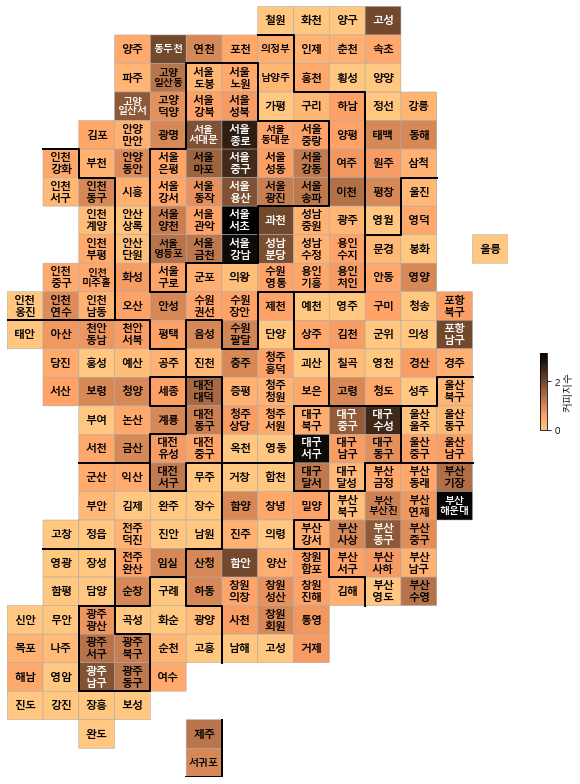

In [19]:
drawKorea('커피지수', cafe_count, 'copper_r')

In [20]:
cafe_folium = cafe_count.set_index('ID')
cafe_folium.head()

,y,x,스타벅스,커피빈,빽다방,이디야,커피지수
ID,,,,,,,
철원,0,7,0.0,0.0,0.0,2.0,0.000000
화천,0,8,0.0,0.0,0.0,1.0,0.000000
양구,0,9,0.0,0.0,0.0,1.0,0.000000
고성(강원),0,10,2.0,0.0,0.0,1.0,2.000000
양주,1,3,7.0,0.0,0.0,15.0,0.466667


### folium

In [21]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [22]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data=geo_data, data=cafe_folium['커피지수'], columns=[cafe_folium.index, cafe_folium['커피지수']], fill_color='YlGnBu', key_on='feature.id')

map